In [38]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import precision_recall_curve
from sklearn import tree


import pycountry_convert as pc
import holidays
from datetime import date

%matplotlib inline
fig=plt.figure(figsize=(18,6))

<Figure size 1296x432 with 0 Axes>

In [6]:
hotel_data_raw = pd.read_csv('./data/hotel_bookings.csv')
hotel_data_raw.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [7]:
# features to be removed: lead_time (since lead time is talking abt the period of time between reservation and checkin), 
#                         arrival_date_year (won't be applicable in the future), company, 
#                         assigned_room_type (should be assigned after arrival)
#                         reservation_status, reservation_status_date (the latest reservation status update time)
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 300


In [8]:
# Change Data Types From Number to String
hotel_data_raw['is_repeated_guest'] = hotel_data_raw['is_repeated_guest'].astype(str)
hotel_data_raw['agent'] = hotel_data_raw['agent'].astype(str)
hotel_data_raw['is_canceled'] = hotel_data_raw['is_canceled'].astype(str)
hotel_data_raw['arrival_date_month'] = hotel_data_raw['arrival_date_month'].astype(str)
hotel_data_raw['arrival_date_day_of_month'] = hotel_data_raw['arrival_date_day_of_month'].astype(str)
hotel_data_raw['arrival_date_week_number'] = hotel_data_raw['arrival_date_week_number'].astype(str)

In [9]:
# normalization (using minmax)
# • Lead_time
# • Days_in_waiting_list
# • Previous_cancellations
# • Previous_bookings_not_canceled
# • Adr
# • Required_car_parking_spaces
# • Adults
# • Children
# • Babies
# • Stays_in_weekend_nights
# • Stays_in_week_nights
# • Required_car_parking_spaces
# • Booking_changes

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['lead_time']])
hotel_data_raw['lead_time'] = minmax_scaler.transform(hotel_data_raw[['lead_time']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['previous_cancellations']])
hotel_data_raw['previous_cancellations'] = minmax_scaler.transform(hotel_data_raw[['previous_cancellations']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['days_in_waiting_list']])
hotel_data_raw['days_in_waiting_list'] = minmax_scaler.transform(hotel_data_raw[['days_in_waiting_list']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['previous_bookings_not_canceled']])
hotel_data_raw['previous_bookings_not_canceled'] = minmax_scaler.transform(hotel_data_raw[['previous_bookings_not_canceled']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['adr']])
hotel_data_raw['adr'] = minmax_scaler.transform(hotel_data_raw[['adr']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['required_car_parking_spaces']])
hotel_data_raw['required_car_parking_spaces'] = minmax_scaler.transform(hotel_data_raw[['required_car_parking_spaces']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['adults']])
hotel_data_raw['adults'] = minmax_scaler.transform(hotel_data_raw[['adults']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['children']])
hotel_data_raw['children'] = minmax_scaler.transform(hotel_data_raw[['children']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['babies']])
hotel_data_raw['babies'] = minmax_scaler.transform(hotel_data_raw[['babies']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['stays_in_weekend_nights']])
hotel_data_raw['stays_in_weekend_nights'] = minmax_scaler.transform(hotel_data_raw[['stays_in_weekend_nights']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['stays_in_week_nights']])
hotel_data_raw['stays_in_week_nights'] = minmax_scaler.transform(hotel_data_raw[['stays_in_week_nights']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['required_car_parking_spaces']])
hotel_data_raw['required_car_parking_spaces'] = minmax_scaler.transform(hotel_data_raw[['required_car_parking_spaces']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['booking_changes']])
hotel_data_raw['booking_changes'] = minmax_scaler.transform(hotel_data_raw[['booking_changes']])

In [10]:
# One-hot encoding:
# • hotel
# • Arrival_date_month
# • Meal
# • Market_segment
# • Distribution_channel
# • Customer_type
# • Deposit_type
# • country

######
# • Week_of_day
# • Holiday_of_day
# • agent
# 	◦ Binary feature
# • Company
# 	◦ Binary feature

In [11]:
# Handle missing values
# test['Age'].fillna(test['Age'].mean(),inplace = True)
hotel_data_raw['children'].fillna(hotel_data_raw['children'].value_counts().index[0],inplace = True)
hotel_data_raw['country'].fillna(hotel_data_raw['country'].value_counts().index[0],inplace = True)
# do nothing for agent and company as its missing value take meanings

In [12]:
# Add new features
hotel_data_raw['is_company'] = (hotel_data_raw['company'].notnull())
hotel_data_raw['is_agent'] = (hotel_data_raw['agent'].notnull())

hotel_data_raw['is_diff_room_type'] = (hotel_data_raw['reserved_room_type'] != hotel_data_raw['assigned_room_type'])
hotel_data_raw_dates = hotel_data_raw['arrival_date_year'].astype(str) + ' ' + hotel_data_raw['arrival_date_month'].astype(str) + ' ' + hotel_data_raw['arrival_date_day_of_month'].astype(str)
# Portugal plus extended days most people have off
holidays_set = holidays.CountryHoliday('PTE')
hotel_data_raw['arrival_date_day_of_the_week'] = [datetime.datetime.strptime(date, '%Y %B %d').strftime('%A') for date in hotel_data_raw_dates]
hotel_data_raw['is_holiday'] = [datetime.datetime.strptime(date, '%Y %B %d').strftime('%Y-%m-%d') in holidays_set for date in hotel_data_raw_dates]


In [13]:
hotel_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  float64
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  object 
 6   arrival_date_day_of_month       119390 non-null  object 
 7   stays_in_weekend_nights         119390 non-null  float64
 8   stays_in_week_nights            119390 non-null  float64
 9   adults                          119390 non-null  float64
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  float64
 12  meal            

In [14]:
hotel_data_raw.head()

hotel is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel           0   0.464043               2015               July   
1  Resort Hotel           0   1.000000               2015               July   
2  Resort Hotel           0   0.009498               2015               July   
3  Resort Hotel           0   0.017639               2015               July   
4  Resort Hotel           0   0.018996               2015               July   

  arrival_date_week_number arrival_date_day_of_month  stays_in_weekend_nights  \
0                       27                         1                      0.0   
1                       27                         1                      0.0   
2                       27                         1                      0.0   
3                       27                         1                      0.0   
4                       27                         1                      0.0   

   stays_in_week_nights    adults  children  babies meal country  \
0                  0.00  0.036364       0.0     0.0   BB     PRT   
1                  0.00  0.036364       0.0     0.0   BB     PRT   
2                  0.02  0.018182       0.0     0.0   BB     GBR   
3                  0.02  0.018182       0.0     0.0   BB     GBR   
4                  0.04  0.036364       0.0     0.0   BB     GBR   

  market_segment distribution_channel is_repeated_guest  \
0         Direct               Direct                 0   
1         Direct               Direct                 0   
2         Direct               Direct                 0   
3      Corporate            Corporate                 0   
4      Online TA                TA/TO                 0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                     0.0                             0.0                  C   
1                     0.0                             0.0                  C   
2                     0.0                             0.0                  A   
3                     0.0                             0.0                  A   
4                     0.0                             0.0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C         0.142857   No Deposit    nan      NaN   
1                  C         0.190476   No Deposit    nan      NaN   
2                  C         0.000000   No Deposit    nan      NaN   
3                  A         0.000000   No Deposit  304.0      NaN   
4                  A         0.000000   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type       adr  required_car_parking_spaces  \
0                   0.0     Transient  0.001180                          0.0   
1                   0.0     Transient  0.001180                          0.0   
2                   0.0     Transient  0.015053                          0.0   
3                   0.0     Transient  0.015053                          0.0   
4                   0.0     Transient  0.019307                          0.0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0          Check-Out              2015-07-01   
1                          0          Check-Out              2015-07-01   
2                          0          Check-Out              2015-07-02   
3                          0          Check-Out              2015-07-02   
4                          1          Check-Out              2015-07-03   

   is_company  is_agent  is_diff_room_type arrival_date_day_of_the_week  \
0       False      True              False                    Wednesday   
1       False      True              False                    Wednesday   
2       False      True               True                    Wednesday   
3       False      True              False                    Wednesday   
4       False      True              False                    Wednesd

In [15]:
le = preprocessing.LabelEncoder()
hotel_data_raw['hotel_encoded'] = le.fit_transform(hotel_data_raw['hotel'])
hotel_data_raw['arrival_date_month_encoded'] = le.fit_transform(hotel_data_raw['arrival_date_month'])
hotel_data_raw['meal_encoded'] = le.fit_transform(hotel_data_raw['meal'])
hotel_data_raw['market_segment_encoded'] = le.fit_transform(hotel_data_raw['market_segment'])
hotel_data_raw['distribution_channel_encoded'] = le.fit_transform(hotel_data_raw['distribution_channel'])
hotel_data_raw['customer_type_encoded'] = le.fit_transform(hotel_data_raw['customer_type'])
hotel_data_raw['deposit_type_encoded'] = le.fit_transform(hotel_data_raw['deposit_type'])
hotel_data_raw['arrival_date_day_of_the_week_encoded'] = le.fit_transform(hotel_data_raw['arrival_date_day_of_the_week'])




hotel_data_raw = pd.get_dummies(hotel_data_raw, columns=[ \
                                                         'hotel', \
                                                         'arrival_date_month', \
                                                         'meal', \
                                                         'market_segment', \
                                                         'distribution_channel', \
                                                         'customer_type', \
                                                         'deposit_type', \
                                                         'arrival_date_day_of_the_week'])

In [16]:
hotel_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 83 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   is_canceled                             119390 non-null  object 
 1   lead_time                               119390 non-null  float64
 2   arrival_date_year                       119390 non-null  int64  
 3   arrival_date_week_number                119390 non-null  object 
 4   arrival_date_day_of_month               119390 non-null  object 
 5   stays_in_weekend_nights                 119390 non-null  float64
 6   stays_in_week_nights                    119390 non-null  float64
 7   adults                                  119390 non-null  float64
 8   children                                119390 non-null  float64
 9   babies                                  119390 non-null  float64
 10  country                                 1193

In [17]:
hotel_data_raw.head()

is_canceled  lead_time  arrival_date_year arrival_date_week_number  \
0           0   0.464043               2015                       27   
1           0   1.000000               2015                       27   
2           0   0.009498               2015                       27   
3           0   0.017639               2015                       27   
4           0   0.018996               2015                       27   

  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                         1                      0.0                  0.00   
1                         1                      0.0                  0.00   
2                         1                      0.0                  0.02   
3                         1                      0.0                  0.02   
4                         1                      0.0                  0.04   

     adults  children  babies country is_repeated_guest  \
0  0.036364       0.0     0.0     PRT                 0   
1  0.036364       0.0     0.0     PRT                 0   
2  0.018182       0.0     0.0     GBR                 0   
3  0.018182       0.0     0.0     GBR                 0   
4  0.036364       0.0     0.0     GBR                 0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                     0.0                             0.0                  C   
1                     0.0                             0.0                  C   
2                     0.0                             0.0                  A   
3                     0.0                             0.0                  A   
4                     0.0                             0.0                  A   

  assigned_room_type  booking_changes  agent  company  days_in_waiting_list  \
0                  C         0.142857    nan      NaN                   0.0   
1                  C         0.190476    nan      NaN                   0.0   
2                  C         0.000000    nan      NaN                   0.0   
3                  A         0.000000  304.0      NaN                   0.0   
4                  A         0.000000  240.0      NaN                   0.0   

        adr  required_car_parking_spaces  total_of_special_requests  \
0  0.001180                          0.0                          0   
1  0.001180                          0.0                          0   
2  0.015053                          0.0                          0   
3  0.015053                          0.0                          0   
4  0.019307                          0.0                          1   

  reservation_status reservation_status_date  is_company  is_agent  \
0          Check-Out              2015-07-01       False      True   
1          Check-Out              2015-07-01       False      True   
2          Check-Out              2015-07-02       False      True   
3          Check-Out              2015-07-02       False      True   
4          Check-Out              2015-07-03       False      True   

   is_diff_room_type  is_holiday  hotel_encoded  arrival_date_month_encoded  \
0              False       False              1                           5   
1              False       False              1                           5   
2               True       False              1                           5   
3              False       False              1                           5   
4              False       False              1                           5   

   meal_encoded  market_segment_encoded  distribution_channel_encoded  \
0             0                       3                             1   
1             0                       3                             1   
2             0                       3                             1   
3             0                       2                             0   
4             0                       6                             3   

   customer_type_encoded  d

In [18]:
hotel_data_raw.corr()

lead_time  arrival_date_year  \
lead_time                                1.000000           0.040142   
arrival_date_year                        0.040142           1.000000   
stays_in_weekend_nights                  0.085671           0.021497   
stays_in_week_nights                     0.165799           0.030883   
adults                                   0.119519           0.029635   
children                                -0.037613           0.054636   
babies                                  -0.020915          -0.013192   
previous_cancellations                   0.086042          -0.119822   
previous_bookings_not_canceled          -0.073548           0.029218   
booking_changes                          0.000149           0.030872   
company                                  0.151464           0.259095   
days_in_waiting_list                     0.170084          -0.056497   
adr                                     -0.063077           0.197580   
required_car_parking_spaces             -0.116451          -0.013684   
total_of_special_requests               -0.095712           0.108531   
is_company                              -0.126280          -0.003020   
is_agent                                      NaN                NaN   
is_diff_room_type                       -0.142220          -0.097402   
is_holiday                               0.000905          -0.000664   
hotel_encoded                           -0.075381          -0.035267   
arrival_date_month_encoded               0.086228          -0.251837   
meal_encoded                             0.000349           0.065840   
market_segment_encoded                   0.013797           0.107697   
distribution_channel_encoded             0.220414           0.022644   
customer_type_encoded                    0.073403          -0.006149   
deposit_type_encoded                     0.375667          -0.064714   
arrival_date_day_of_the_week_encoded    -0.007171           0.019540   
hotel_City Hotel                         0.075381           0.035267   
hotel_Resort Hotel                      -0.075381          -0.035267   
arrival_date_month_April                -0.027514           0.160090   
arrival_date_month_August                0.058121          -0.041982   
arrival_date_month_December             -0.069918          -0.203670   
arrival_date_month_February             -0.141459           0.137434   
arrival_date_month_January              -0.125571           0.150020   
arrival_date_month_July                  0.104140           0.021336   
arrival_date_month_June                  0.072029           0.161462   
arrival_date_month_March                -0.094810           0.148271   
arrival_date_month_May                   0.042237           0.177269   
arrival_date_month_November             -0.063054          -0.173943   
arrival_date_month_October               0.057043          -0.272664   
arrival_date_month_September             0.094956          -0.282448   
meal_BB                                 -0.038259          -0.032865   
meal_FB                                  0.009714          -0.057964   
meal_HB                                  0.136633          -0.057955   
meal_SC                                 -0.097617           0.128706   
meal_Undefined                          -0.015512           0.007213   
market_segment_Aviation                 -0.041554           0.019390   
market_segment_Complementary            -0.067184          -0.010135   
market_segment_Corporate                -0.165075          -0.025186   
market_segment_Direct                   -0.174111           0.013156   
market_segment_Groups                    0.346275          -0.106530   
market_segment_Offline TA/TO             0.146307          -0.123760   
market_segment_Online TA                -0.186304           0.181268   
market_segment_Undefined                -0.003926          -0.006691   
distribution_channel_Corporate          -0.134609          -0.030312   
distribu

In [19]:
continents = []

continent_name_code = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'AQ': 'Antarctica',
    'EU': 'Europe',
    
}

for country in hotel_data_raw["country"]:
    try:
        if country == 'CN':
            country_code == 'CN'
        elif country == 'TMP':
            country_code == 'TL'
        else:
            country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")

    except:
        print(country,'is not valid')
    
    try:
        #Antarctica
        if country_code == 'AQ':
            continent = 'AQ'
        #United States Minor Outlying Islands
        elif country_code == 'UM':
            continent = 'NA'
        #French Southern and Antarctic Lands
        elif country_code == 'TF':
            continent = 'EU'
        else:
            continent = pc.country_alpha2_to_continent_code(country_code)
    except:
        print(country_code,'is not valid for continent')

        
    continents.append(continent_name_code[continent])
    

hotel_data_raw['continent'] = continents



In [20]:
hotel_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 84 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   is_canceled                             119390 non-null  object 
 1   lead_time                               119390 non-null  float64
 2   arrival_date_year                       119390 non-null  int64  
 3   arrival_date_week_number                119390 non-null  object 
 4   arrival_date_day_of_month               119390 non-null  object 
 5   stays_in_weekend_nights                 119390 non-null  float64
 6   stays_in_week_nights                    119390 non-null  float64
 7   adults                                  119390 non-null  float64
 8   children                                119390 non-null  float64
 9   babies                                  119390 non-null  float64
 10  country                                 1193

In [21]:
hotel_data_raw['continent_encoded'] = le.fit_transform(hotel_data_raw['continent'])

hotel_data_raw = pd.get_dummies(hotel_data_raw, columns=['continent'])


In [22]:
hotel_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 91 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   is_canceled                             119390 non-null  object 
 1   lead_time                               119390 non-null  float64
 2   arrival_date_year                       119390 non-null  int64  
 3   arrival_date_week_number                119390 non-null  object 
 4   arrival_date_day_of_month               119390 non-null  object 
 5   stays_in_weekend_nights                 119390 non-null  float64
 6   stays_in_week_nights                    119390 non-null  float64
 7   adults                                  119390 non-null  float64
 8   children                                119390 non-null  float64
 9   babies                                  119390 non-null  float64
 10  country                                 1193

In [23]:
hotel_data_raw.to_csv('Hotel_Bookings_Prepared.csv')

In [24]:
i=1
fig=plt.figure(figsize=(240,100))
for col in hotel_data_raw.select_dtypes([np.number]).columns:
    ax = plt.subplot(7,11,i)
    ax.set_title(col)
    i = i+1
    hotel_data_raw[col].hist()

## Data Visualization

## Data Modeling

### Decision Tree

# **Decision Tree Classifier and Model Evaluation**

In [26]:
# load data
predhotel = pd.read_csv('Hotel_Bookings_Prepared.csv')
pd.options.display.max_rows=1000
pd.options.display.max_columns=300

# one hot encoding
predhotel = pd.get_dummies(predhotel, columns=['arrival_date_week_number','reserved_room_type','assigned_room_type',\
                                               'is_diff_room_type','is_agent','is_company'])

# features to not selected
predhotel = predhotel.drop(['Unnamed: 0','is_repeated_guest','arrival_date_day_of_month','country',\
                            'company','agent','arrival_date_year','reservation_status',\
                            'reservation_status_date','hotel_encoded',\
                            'arrival_date_month_encoded','meal_encoded','market_segment_encoded','distribution_channel_encoded',\
                            'customer_type_encoded','deposit_type_encoded'],axis=1)
# assign features
features = predhotel.columns[1:].tolist()
label = predhotel.columns[:1].tolist()

X = predhotel[features]
y = predhotel[label]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)



In [27]:
predhotel.info()

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 119390 entries, 0 to 119389
# Columns: 165 entries, Unnamed: 0 to is_company_True
# dtypes: float64(14), int64(60), object(3), uint8(88)
# memory usage: 80.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Columns: 150 entries, is_canceled to is_company_True
dtypes: bool(1), float64(12), int64(57), uint8(80)
memory usage: 72.1 MB


number of nodes of model 1: 19787
Accuracy 0.8248178239383533
Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86     29989
           1       0.77      0.76      0.76     17767

    accuracy                           0.82     47756
   macro avg       0.81      0.81      0.81     47756
weighted avg       0.82      0.82      0.82     47756

Confusion Matrix 
 [[25846  4143]
 [ 4223 13544]]
ROC-AUC
AUC: 0.8148973276092681


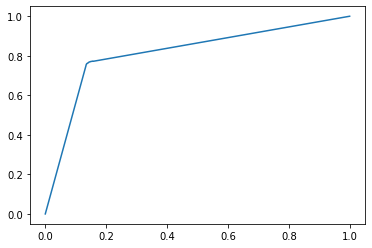

PR-AUC
PR-AUC: 0.8070544907742797


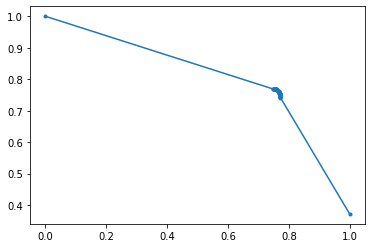

In [34]:
# Model 1 (without pre-setting parameters)
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)
treeObj1 = model1.tree_
print("number of nodes of model 1: " + str(treeObj1.node_count))
pred_test1 = model1.predict(X_test)

print("Accuracy",accuracy_score(y_test,pred_test1,normalize=True,sample_weight=None))
print("Classification Report",'\n',classification_report(y_test,pred_test1))
print("Confusion Matrix",'\n',confusion_matrix(y_test,pred_test1))

########################################################################
####################### ROC-AUC ########################################
print('ROC-AUC')
predictions = model1.predict_proba(X_test)
fpr,tpr, _ = roc_curve(y_test, predictions[:,1])
print('AUC: '+ str(auc(fpr, tpr)))
plt.clf()
plt.plot(fpr,tpr)
plt.show()


########################################################################
####################### PR-AUC #########################################
print('PR-AUC')
yhat = model1.predict_proba(X_test)
pos_probs = yhat[:,1]
precision, recall, _ = precision_recall_curve(y_test,pos_probs)
auc_score = auc(recall,precision)
print('PR-AUC: ' + str(auc_score))
plt.plot(recall, precision, marker='.')
plt.show()


number of nodes of model 2: 169
Accuracy 0.817635480358489
Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.94      0.87     29989
           1       0.86      0.61      0.71     17767

    accuracy                           0.82     47756
   macro avg       0.83      0.78      0.79     47756
weighted avg       0.82      0.82      0.81     47756

Confusion Matrix 
 [[28186  1803]
 [ 6906 10861]]
ROC-AUC
AUC: 0.8766871139368615


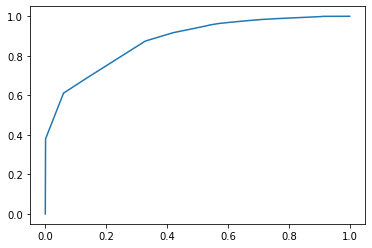

PR-AUC
PR-AUC: 0.8479387512883124


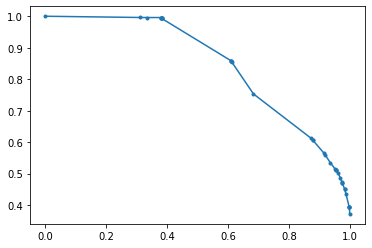

In [36]:
# Model 2
### max depth and leaf nodes generated by GridSearchCV ###
model2 = DecisionTreeClassifier(max_depth=8,max_leaf_nodes=200)
model2.fit(X_train,y_train)
treeObj2 = model2.tree_
print("number of nodes of model 2: " + str(treeObj2.node_count))
pred_test2 = model2.predict(X_test)

print("Accuracy",accuracy_score(y_test,pred_test2,normalize=True,sample_weight=None))
print("Classification Report",'\n',classification_report(y_test,pred_test2))
print("Confusion Matrix",'\n',confusion_matrix(y_test,pred_test2))


########################################################################
####################### ROC-AUC ########################################
print('ROC-AUC')
predictions = model2.predict_proba(X_test)
fpr,tpr, _ = roc_curve(y_test, predictions[:,1])
print('AUC: '+ str(auc(fpr, tpr)))
plt.clf()
plt.plot(fpr,tpr)
plt.show()


########################################################################
####################### PR-AUC #########################################
print('PR-AUC')
yhat = model2.predict_proba(X_test)
pos_probs = yhat[:,1]
precision, recall, _ = precision_recall_curve(y_test,pos_probs)
auc_score = auc(recall,precision)
print('PR-AUC: ' + str(auc_score))
plt.plot(recall, precision, marker='.')
plt.show()

# **Tree Visualization**

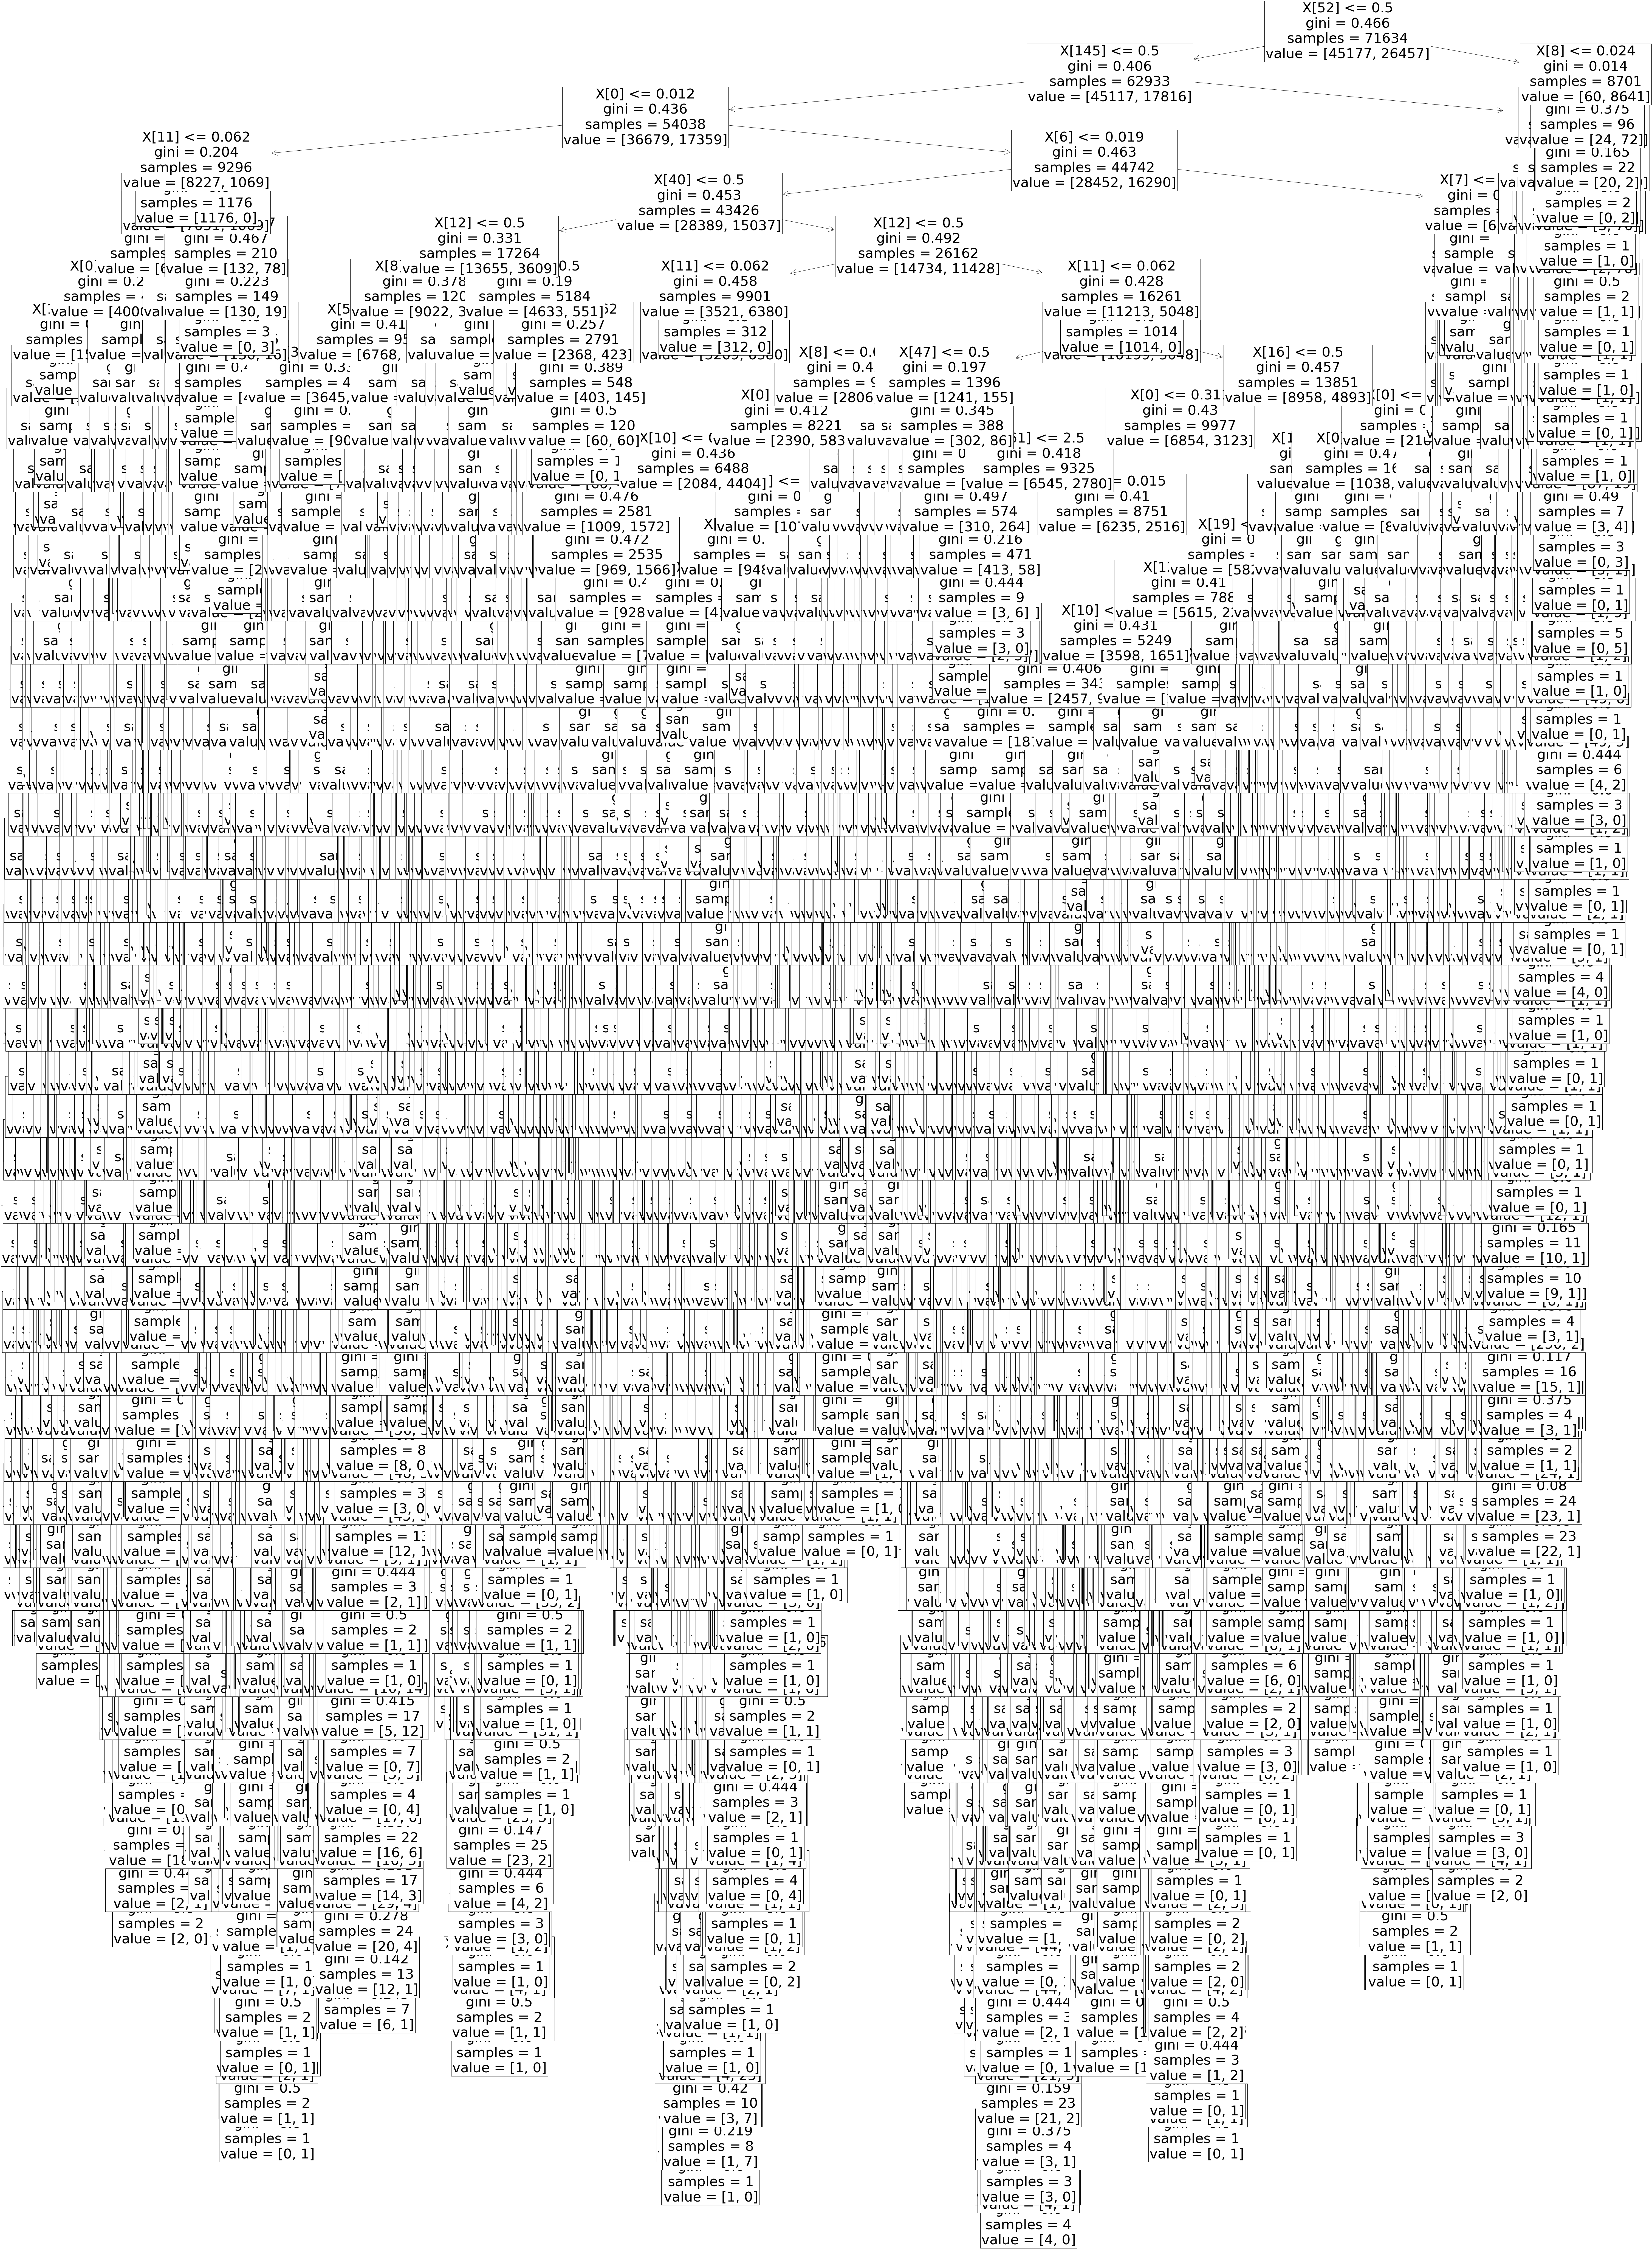

In [39]:
# Visualize tree (before CV)
plt.figure(figsize=(100,150))
tree.plot_tree(model1,ax=None,fontsize=50)
plt.show()

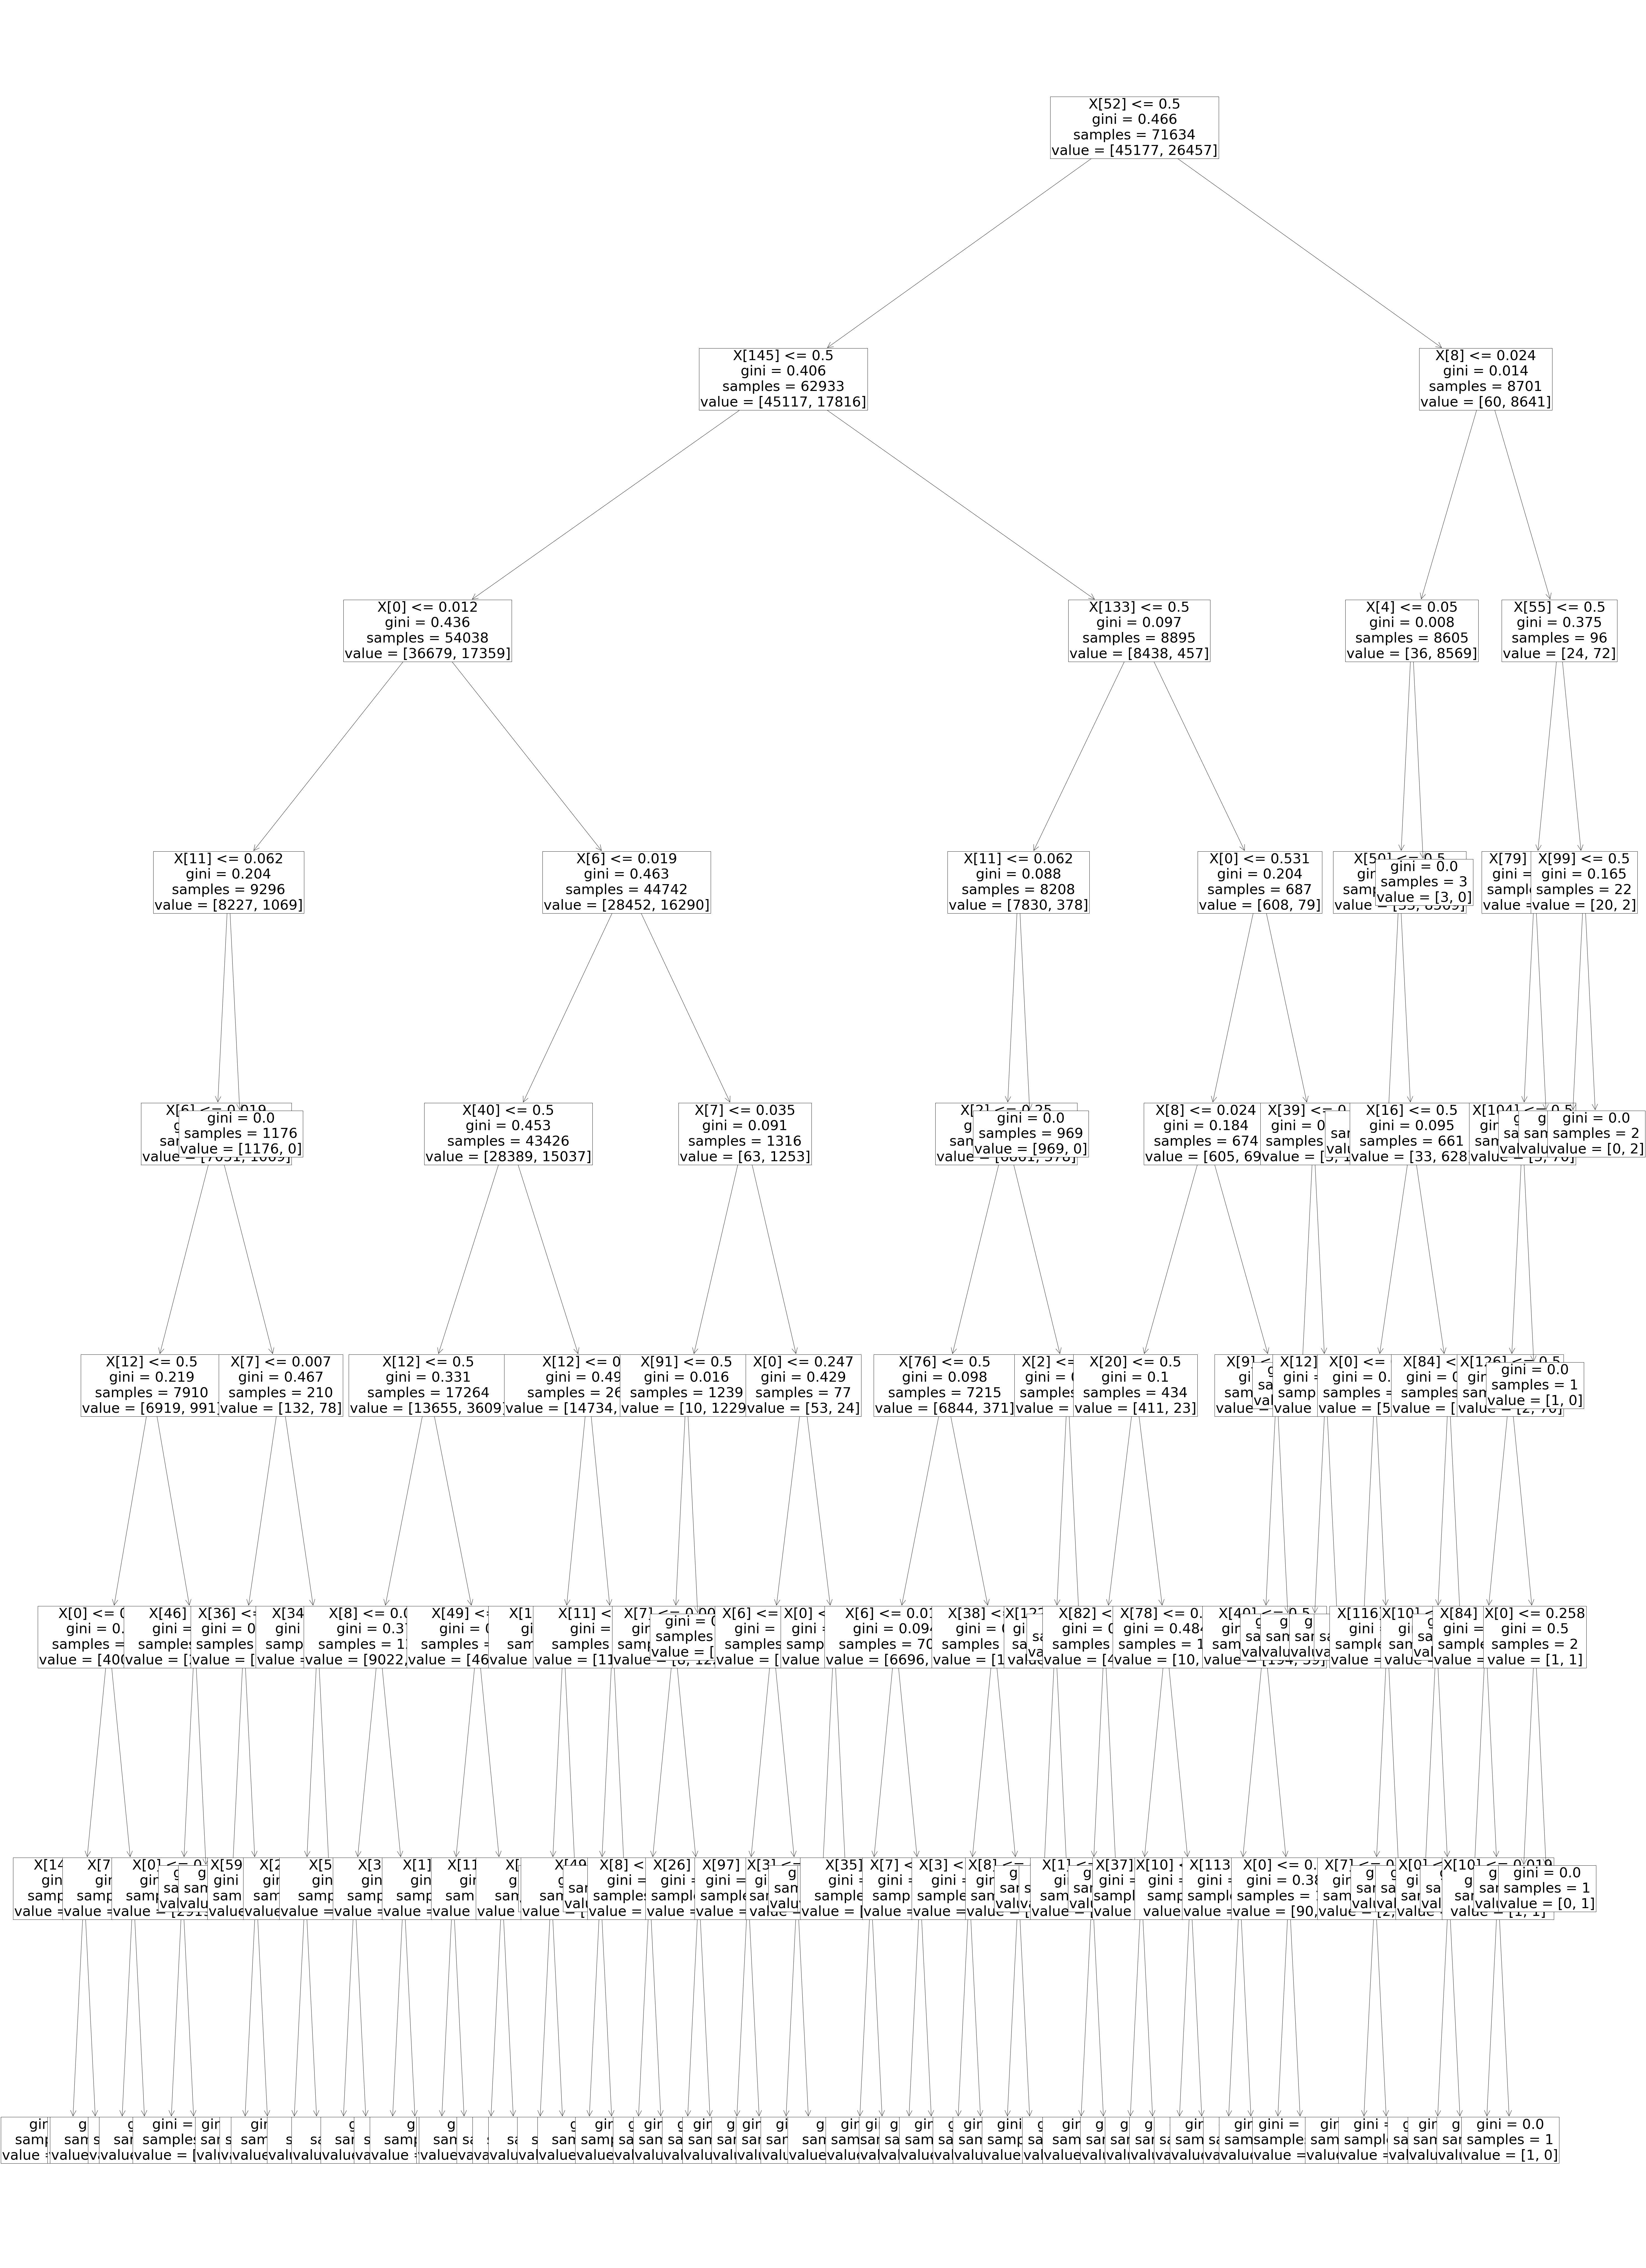

In [40]:
# Visualize tree (after CV)
plt.figure(figsize=(100,150))
tree.plot_tree(model2,ax=None,fontsize=50)
plt.show()

# **GridSearchCV to find best parameter**

In [ ]:
# load data
predhotel = pd.read_csv('Hotel_Bookings_Prepared.csv')
pd.options.display.max_rows=1000
pd.options.display.max_columns=300
    
# one hot encoding
predhotel = pd.get_dummies(predhotel, columns=['arrival_date_week_number','reserved_room_type','assigned_room_type',\
                                               'is_diff_room_type','is_agent','is_company'])

# features to not selected
predhotel = predhotel.drop(['Unnamed: 0','is_repeated_guest','arrival_date_day_of_month','country',\
                            'company','agent','arrival_date_year','reservation_status',\
                            'reservation_status_date','hotel_encoded',\
                            'arrival_date_month_encoded','meal_encoded','market_segment_encoded','distribution_channel_encoded',\
                            'customer_type_encoded','deposit_type_encoded'],axis=1)
# assign features
features = predhotel.columns[1:].tolist()
label = predhotel.columns[:1].tolist()

X = predhotel[features]
y = predhotel[label]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


model = DecisionTreeClassifier()

# CV
score_cv = cross_val_score(model,X_train,y_train,cv=10)

# Accuracy from cross validation
print('Average accuracy score is ' + str(score_cv.mean()))

# Grid Search CV
## define number to try out for max leaf nodes
num_leafs = [5,10,50,100,200]
depths = np.arange(1,21)

# Set param_grid
try_grid = [{'max_depth':depths,'max_leaf_nodes':num_leafs}]
print(try_grid)

# Define model with GridSearch CV
DTM = GridSearchCV(DecisionTreeClassifier(),param_grid=try_grid,cv=10,n_jobs=-1)

# Fit mode with training data
DTM.fit(X_train,y_train)

# Find best parameter
print('best parameters: '+str(DTM.best_params_))

# Find accuracy from best parameters
print('best accuracy score: ' + str(DTM.best_score_))

Average accuracy score is 0.8209948283844449
[{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]), 'max_leaf_nodes': [5, 10, 50, 100, 200]}]


### Logistic Regression

### Naive Bayes

### Random Forest

### Neural Network